# 통계적 추론 (statistical inference)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '결측치 수(null)' : df.isnull().sum(),
                       '결측치 비율' : (df.isnull().sum()/df.shape[0]).round(4)*100,
                       '고유값 수(nunique)' : df.nunique()})
    return tf

## Inferential statistics
Inferential statistical analysis infers properties of a population. for example by testing hypothesis and deriving estimates

In [3]:
population = np.random.randint(10, 20, 10000)
np.random.seed(10)
estimates=[]
for i in range(200):
    sample = np.random.choice(a=population, size=100)
    estimates.append(sample.mean())

In [4]:
np.mean(population)

14.4336

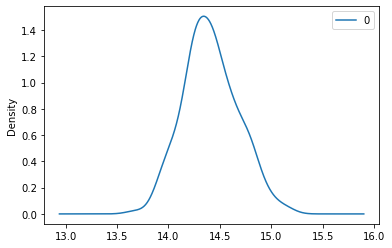

In [5]:
pd.DataFrame(estimates).plot(kind= 'density')

## <font color='red'> 1. Point of estimations:
### Confidence interval
Confidence interval = (sample mean +_ margin of error)
margin of error = critical_vlaue*(np.std()/sample size)

In [6]:
import scipy.stats as stats
stats.norm.ppf(0.975) # percent point function
stats.norm.ppf(0.95)
stats.norm.ppf(0.90)

1.959963984540054

1.6448536269514722

1.2815515655446004

In [7]:
z = stats.norm.ppf(0.975)
z
margin_of_error = z * (np.std(estimates)/np.sqrt(200))

1.959963984540054

In [8]:
upper_limit = np.mean(estimates) + margin_of_error
lower_limit = np.mean(estimates) - margin_of_error

In [9]:
upper_limit
lower_limit
np.mean(estimates)

14.447563967318551

14.374436032681448

14.411

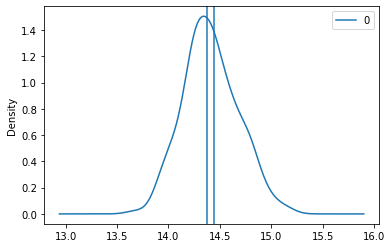

In [10]:
pd.DataFrame(estimates).plot(kind= 'density')
plt.axvline(x=upper_limit); plt.axvline(x=lower_limit)

## <font color='red'> 2. Confidence intervals

In [11]:
stats.norm.ppf(0.975)

1.959963984540054

In [12]:
from scipy.stats import norm

In [13]:
norm.ppf(0.975)
norm.ppf(0.995)

1.959963984540054

2.5758293035489004

C:\Users\NFSI291\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


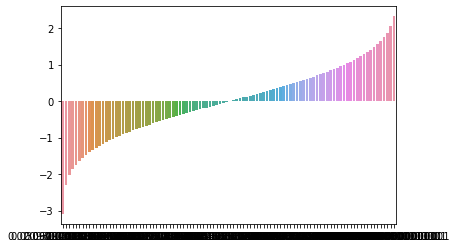

In [14]:
import seaborn as sns

y_pdf =[]
for i in np.linspace(0.001,1,100, endpoint=False):
    y_pdf.append(norm.ppf(i))
sns.barplot(np.linspace(0.001,1,100, endpoint=False), y_pdf)

 sample mean +_ norm.ppf*(sigma/root(sample size))* sample_mean

In [15]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns= data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
summary(df)

,데이터형태(dtypes),결측치 수(null),결측치 비율,고유값 수(nunique)
MedInc,float64,0,0.0,12928
HouseAge,float64,0,0.0,52
AveRooms,float64,0,0.0,19392
AveBedrms,float64,0,0.0,14233
Population,float64,0,0.0,3888
AveOccup,float64,0,0.0,18841
Latitude,float64,0,0.0,862
Longitude,float64,0,0.0,844


(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <a list of 10 Patch objects>)

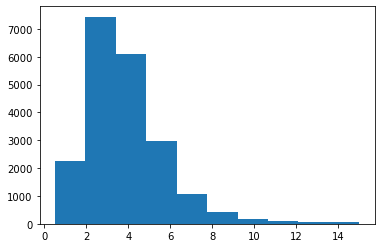

In [17]:
plt.hist(df['MedInc'])

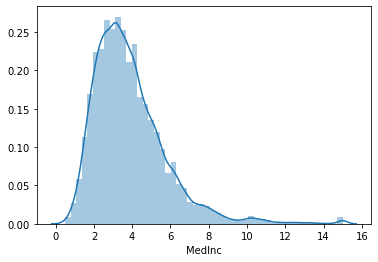

In [18]:
sns.distplot(df['MedInc'])

In [19]:
n = len(df)
con_coef = 0.95
alpha = 1 - con_coef # Type 1 error

In [20]:
x_bar = df['MedInc'].mean()
sigma = df['MedInc'].std()

In [21]:
z_interval = norm.interval(alpha = con_coef)

In [22]:
import math
standard_error = sigma/math.sqrt(n)

Calculate Intervals

In [23]:
z_critical = norm.ppf(q = 0.975)

In [24]:
CI_lower = x_bar - z_critical*standard_error
CI_upper = x_bar + z_critical*standard_error
CI_lower, CI_upper

(3.8447527279643237, 3.8965892778497255)

Taking Sample

In [25]:
n_sample = 1000
data = df.iloc[np.random.choice(df.index, n_sample), :]
data.shape
data.head()

(1000, 8)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14248,2.2024,5.0,4.098985,0.982234,1094.0,2.776650,32.72,-117.10
19217,2.4722,16.0,4.722298,1.082079,1567.0,2.143639,38.47,-122.67
2337,5.0864,4.0,6.964286,1.084416,1024.0,3.324675,36.83,-119.67
16173,1.2387,42.0,4.248741,1.132931,3549.0,3.574018,37.72,-122.42
11233,3.7917,32.0,5.133710,1.047081,1513.0,2.849341,33.82,-117.96


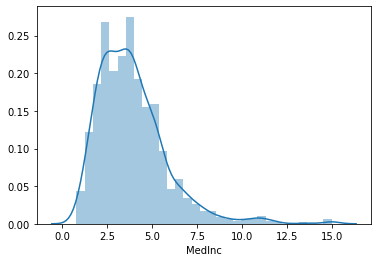

In [26]:
p = sns.distplot(data.MedInc)

In [27]:
mean_sample = data.MedInc.mean()
sigma_sample = data.MedInc.mean()
se_sample = sigma_sample/math.sqrt(n_sample)
mean_sample - z_critical*se_sample
mean_sample + z_critical*se_sample

3.6573951964686717

4.140718403531336

# <font color='red'> 3. 상관계수와 공분산(scatter plot)

In [28]:
# Load the example dataset for Anscombe's quartet
data = sns.load_dataset("anscombe")
data

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [29]:
data.groupby(['dataset'])['x', 'y'].agg(['mean', 'std'])

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579

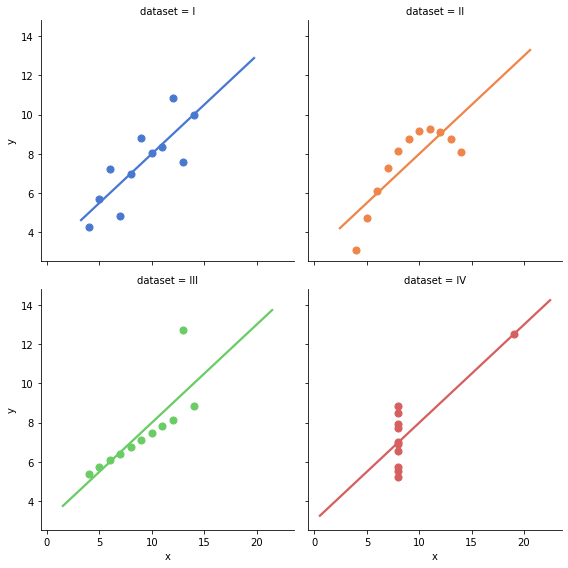

In [30]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=data,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [31]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns= data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [32]:
summary(df)

,데이터형태(dtypes),결측치 수(null),결측치 비율,고유값 수(nunique)
MedInc,float64,0,0.0,12928
HouseAge,float64,0,0.0,52
AveRooms,float64,0,0.0,19392
AveBedrms,float64,0,0.0,14233
Population,float64,0,0.0,3888
AveOccup,float64,0,0.0,18841
Latitude,float64,0,0.0,862
Longitude,float64,0,0.0,844


In [33]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


### 상관계수

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


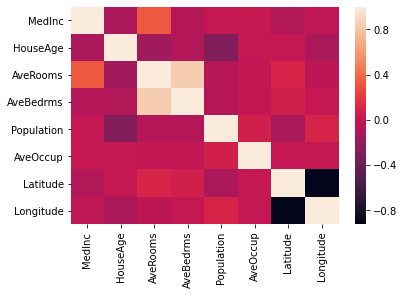

In [34]:
df.corr()
sns.heatmap(df.corr())

### 공분산

In [35]:
df.cov()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,3.609323,-2.846140,1.536568,-0.055858,1.040098e+01,0.370289,-0.323860,-0.057765
HouseAge,-2.846140,158.396260,-4.772882,-0.463718,-4.222271e+03,1.724298,0.300346,-2.728244
AveRooms,1.536568,-4.772882,6.121533,0.993868,-2.023337e+02,-0.124689,0.562235,-0.136518
AveBedrms,-0.055858,-0.463718,0.993868,0.224592,-3.552723e+01,-0.030424,0.070575,0.012670
Population,10.400979,-4222.270582,-202.333712,-35.527225,1.282470e+06,821.712002,-263.137814,226.377839
AveOccup,0.370289,1.724298,-0.124689,-0.030424,8.217120e+02,107.870026,0.052492,0.051519
Latitude,-0.323860,0.300346,0.562235,0.070575,-2.631378e+02,0.052492,4.562293,-3.957054
Longitude,-0.057765,-2.728244,-0.136518,0.012670,2.263778e+02,0.051519,-3.957054,4.014139


<font color='red'> mean_centering 한 후에 표준편차로 나누어 평균이 '0' 분산이'1'이 되도록 자료표준화(normalization)을 한다.

In [36]:
for col in df.columns:
    df[col] = (df[col] - df[col].mean())/df[col].std()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


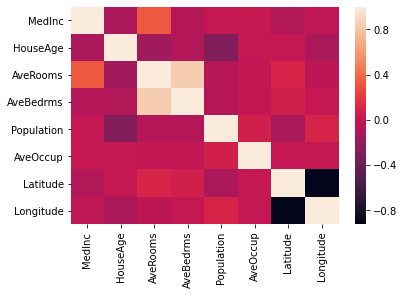

In [37]:
df.cov()
sns.heatmap(df.cov())